In [ ]:
!pip install --quiet duckdb pandas pyarrow matplotlib seaborn
import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



In [ ]:
from pathlib import Path

db_path = Path(r"C:\Users\Nebula PC\Swinburne\Intern\boxai\data\numero.duckdb")
assert db_path.exists(), f"DB not found: {db_path}"

con = duckdb.connect(database=str(db_path))

tables_df = con.sql("SHOW TABLES").df()
tables_df

,name
0,films_basic_clean
1,films_clean
2,films_raw
3,films_strict
4,films_with_fallback


In [ ]:

table_name = tables_df.loc[0, 'name'] if 'name' in tables_df.columns and len(tables_df) else None
if table_name is None:
    raise ValueError("No tables found. Check your database.")

df = con.table(table_name).df()  # load selected table

# Basic inspection
print(f"Loaded table: {table_name} with shape {df.shape}")
display(df.head())
display(df.info())
display(df.describe(include='all'))

Loaded table: films_basic_clean with shape (27089, 24)


,film_id,title,title_norm,play_week,previous_week_rank,distributor_id,distributor_name,distributor_norm,censor_rating,gross_weekend,...,cumulative_gross_prev_weekend,screens_prev_weekend,theatres_prev_weekend,gross_prev_week,cumulative_gross_prev_week,screens_prev_week,theatres_prev_week,is_weekend_gross_missing,gross_weekend_final,week_date
0,45953,Scream VI,scream vi,1,<NA>,6,Paramount,paramount,MA15+,264206957.0,...,NaN,<NA>,<NA>,28513503.0,2.851350e+07,186,186,False,264206957.0,2023-03-09
1,38213,Creed III,creed iii,2,1,3,Warner Bros.,warner bros.,M,203593442.0,...,3.347837e+08,430,274,413886876.0,4.138869e+08,430,274,False,203593442.0,2023-03-09
2,38819,65,65,1,<NA>,2,Sony,sony,M,118723573.0,...,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,False,118723573.0,2023-03-09
3,19466,Ant-Man and The Wasp: Quantumania,ant-man and the wasp: quantumania,4,2,7,Walt Disney,walt disney,M,76090305.0,...,1.367922e+09,511,308,175583178.0,1.399696e+09,511,309,False,76090305.0,2023-03-09
4,47449,Cocaine Bear,cocaine bear,3,3,4,Universal,universal,MA15+,49712489.0,...,2.884566e+08,296,266,123413914.0,3.154096e+08,296,266,False,49712489.0,2023-03-09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27089 entries, 0 to 27088
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   film_id                        27089 non-null  int32         
 1   title                          27089 non-null  object        
 2   title_norm                     27089 non-null  object        
 3   play_week                      27089 non-null  int32         
 4   previous_week_rank             13316 non-null  Int32         
 5   distributor_id                 27089 non-null  int32         
 6   distributor_name               27089 non-null  object        
 7   distributor_norm               27089 non-null  object        
 8   censor_rating                  27012 non-null  object        
 9   gross_weekend                  22744 non-null  float64       
 10  cumulative_gross_weekend       16978 non-null  float64       
 11  screens_weekend

None

,film_id,title,title_norm,play_week,previous_week_rank,distributor_id,distributor_name,distributor_norm,censor_rating,gross_weekend,...,cumulative_gross_prev_weekend,screens_prev_weekend,theatres_prev_weekend,gross_prev_week,cumulative_gross_prev_week,screens_prev_week,theatres_prev_week,is_weekend_gross_missing,gross_weekend_final,week_date
count,27089.000000,27089,27089,27089.000000,13316.0,27089.000000,27089,27089,27012,2.274400e+04,...,1.203100e+04,13457.0,13457.0,1.495500e+04,1.321300e+04,14954.0,14954.0,27089,2.370900e+04,27089
unique,NaN,4670,4670,NaN,<NA>,NaN,171,171,8,NaN,...,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,2,NaN,NaN
top,NaN,A Beautiful Planet,a beautiful planet,NaN,<NA>,NaN,Madman,madman,M,NaN,...,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,False,NaN,NaN
freq,NaN,93,93,NaN,<NA>,NaN,2199,2199,10410,NaN,...,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,22744,NaN,NaN
mean,44884.106316,NaN,NaN,592.898446,81.431511,298.332718,NaN,NaN,NaN,7.997774e+06,...,3.791625e+08,43.311362,38.387382,1.685029e+07,3.692678e+08,41.392537,37.023204,NaN,7.683055e+06,2024-05-11 20:28:25.843700
min,10.000000,NaN,NaN,-64.000000,1.0,1.000000,NaN,NaN,NaN,1.000000e+02,...,2.000000e+03,1.0,1.0,1.000000e+02,1.250000e+03,1.0,1.0,NaN,1.000000e+02,2023-01-05 00:00:00
25%,25289.000000,NaN,NaN,3.000000,29.0,6.000000,NaN,NaN,NaN,5.410000e+04,...,6.966254e+06,1.0,1.0,1.141000e+05,6.921663e+06,1.0,1.0,NaN,5.160000e+04,2023-09-28 00:00:00
50%,50727.000000,NaN,NaN,15.000000,67.0,17.000000,NaN,NaN,NaN,1.700000e+05,...,3.200026e+07,6.0,6.0,4.888000e+05,3.094319e+07,5.0,5.0,NaN,1.596000e+05,2024-05-23 00:00:00
75%,63213.000000,NaN,NaN,927.000000,124.0,46.000000,NaN,NaN,NaN,8.785742e+05,...,1.751701e+08,29.0,29.0,3.243494e+06,1.529930e+08,27.0,27.0,NaN,8.089800e+05,2024-12-19 00:00:00
max,83833.000000,NaN,NaN,5429.000000,300.0,3806.000000,NaN,NaN,NaN,1.956146e+09,...,9.375708e+09,1008.0,346.0,2.582307e+09,9.375708e+09,1008.0,349.0,NaN,1.956146e+09,2025-07-31 00:00:00


In [ ]:
con.sql(f"DESCRIBE {table_name}").df()

,column_name,column_type,null,key,default,extra
0,film_id,INTEGER,YES,None,None,None
1,title,VARCHAR,YES,None,None,None
2,title_norm,VARCHAR,YES,None,None,None
3,play_week,INTEGER,YES,None,None,None
4,previous_week_rank,INTEGER,YES,None,None,None
5,distributor_id,INTEGER,YES,None,None,None
6,distributor_name,VARCHAR,YES,None,None,None
7,distributor_norm,VARCHAR,YES,None,None,None
8,censor_rating,VARCHAR,YES,None,None,None
9,gross_weekend,DOUBLE,YES,None,None,None


After cleaning shape: (27089, 24)


,film_id,title,title_norm,play_week,previous_week_rank,distributor_id,distributor_name,distributor_norm,censor_rating,gross_weekend,...,cumulative_gross_prev_weekend,screens_prev_weekend,theatres_prev_weekend,gross_prev_week,cumulative_gross_prev_week,screens_prev_week,theatres_prev_week,is_weekend_gross_missing,gross_weekend_final,week_date
0,45953,Scream VI,scream vi,1,<NA>,6,Paramount,paramount,MA15+,264206957.0,...,NaN,<NA>,<NA>,28513503.0,2.851350e+07,186,186,False,264206957.0,2023-03-09
1,38213,Creed III,creed iii,2,1,3,Warner Bros.,warner bros.,M,203593442.0,...,3.347837e+08,430,274,413886876.0,4.138869e+08,430,274,False,203593442.0,2023-03-09
2,38819,65,65,1,<NA>,2,Sony,sony,M,118723573.0,...,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,False,118723573.0,2023-03-09
3,19466,Ant-Man and The Wasp: Quantumania,ant-man and the wasp: quantumania,4,2,7,Walt Disney,walt disney,M,76090305.0,...,1.367922e+09,511,308,175583178.0,1.399696e+09,511,309,False,76090305.0,2023-03-09
4,47449,Cocaine Bear,cocaine bear,3,3,4,Universal,universal,MA15+,49712489.0,...,2.884566e+08,296,266,123413914.0,3.154096e+08,296,266,False,49712489.0,2023-03-09


cumulative_gross_prev_weekend    0.555871
cumulative_gross_prev_week       0.512237
previous_week_rank               0.508435
screens_prev_weekend             0.503230
gross_prev_weekend               0.503230
theatres_prev_weekend            0.503230
screens_prev_week                0.447968
theatres_prev_week               0.447968
gross_prev_week                  0.447931
cumulative_gross_weekend         0.373251
screens_weekend                  0.160397
theatres_weekend                 0.160397
gross_weekend                    0.160397
gross_weekend_final              0.124774
film_id                          0.000000
title_norm                       0.000000
distributor_norm                 0.000000
distributor_name                 0.000000
distributor_id                   0.000000
play_week                        0.000000
title                            0.000000
censor_rating                    0.000000
is_weekend_gross_missing         0.000000
week_date                        0

title               4670
title_norm          4670
distributor_name     171
distributor_norm     171
censor_rating          9
dtype: int64

,count,mean,std,min,25%,50%,75%,max
film_id,27089.0,44884.106316,22397.7392,10.0,25289.0,50727.0,63213.0,83833.0
play_week,27089.0,592.898446,1012.432945,-64.0,3.0,15.0,927.0,5429.0
previous_week_rank,13316.0,81.431511,62.543213,1.0,29.0,67.0,124.0,300.0
distributor_id,27089.0,298.332718,671.416481,1.0,6.0,17.0,46.0,3806.0
gross_weekend,22744.0,7997774.322942,52461280.412099,100.0,54100.0,170000.0,878574.25,1956146398.0
cumulative_gross_weekend,16978.0,392226662.906879,1114648639.916901,1000.0,4982188.0,25870289.5,149780704.75,9376227060.0
screens_weekend,22744.0,26.715925,76.02771,1.0,1.0,2.0,11.0,1008.0
theatres_weekend,22744.0,23.831516,60.011433,1.0,1.0,2.0,11.0,346.0
gross_prev_weekend,13457.0,13367336.553838,68216677.238944,1000.0,96900.0,412286.0,2739825.0,1956146398.0
cumulative_gross_prev_weekend,12031.0,379162506.194996,1091182787.729135,2000.0,6966254.0,32000256.0,175170100.0,9375708460.0


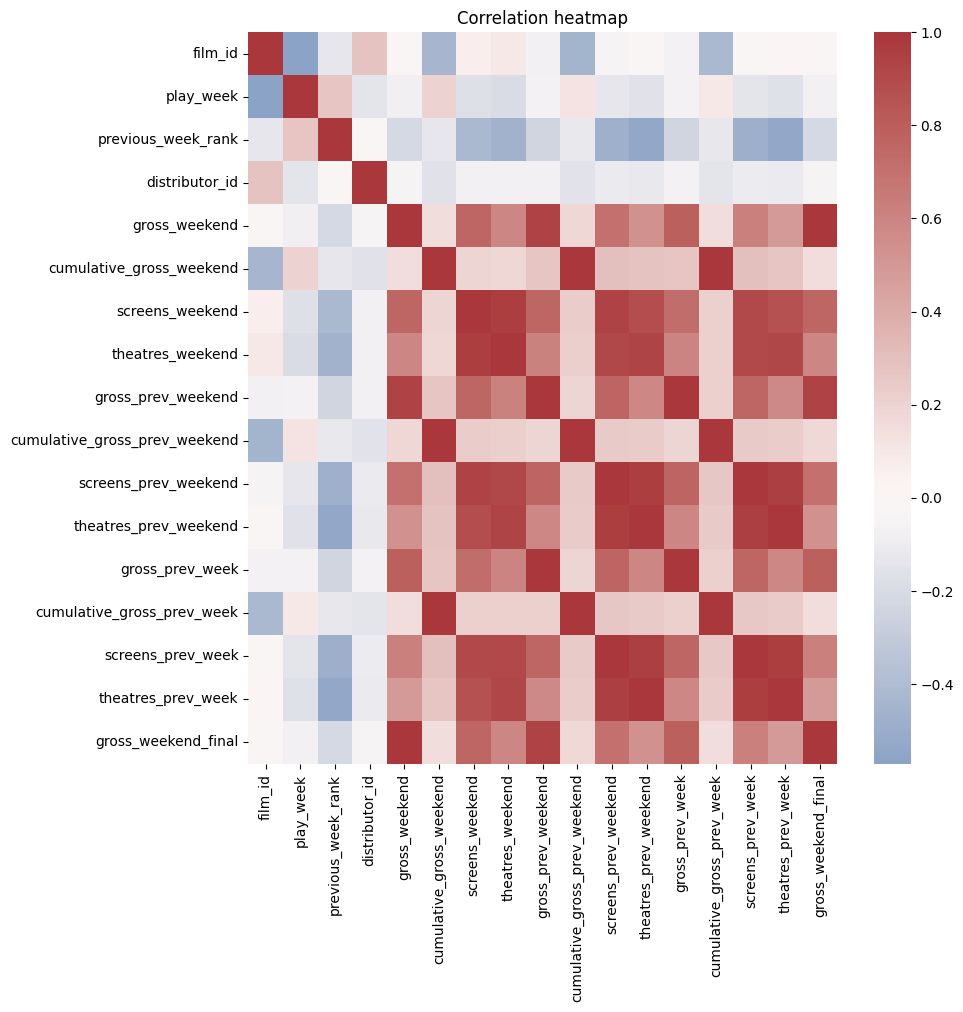

In [ ]:

try:
    df  
except NameError:
    tabs = con.sql("SHOW TABLES").df()
    names = tabs['name'].tolist() if 'name' in tabs.columns else []
    preferred = None
    if 'table_name' in globals() and isinstance(table_name, str):
        if f"{table_name}_cleaned" in names:
            preferred = f"{table_name}_cleaned"
        elif table_name in names:
            preferred = table_name
    if preferred is None and names:
        preferred = names[0]
    if preferred is None:
        raise ValueError("No tables found to load into df. Run the load cell or set table_name.")
    df = con.table(preferred).df()
    table_name = preferred
    print(f"Loaded table for EDA: {table_name} shape={df.shape}")

df_flat = df.copy()  # already cleaned in DataGrip

for c in df_flat.select_dtypes(include=['object']).columns:
    df_flat[c] = df_flat[c].astype(str).str.strip()


df_flat = df_flat.loc[:, ~df_flat.columns.duplicated()]

df_flat = df_flat.drop_duplicates()

print("After cleaning shape:", df_flat.shape)
display(df_flat.head())

#  Nulls overview
nulls = df_flat.isna().mean().sort_values(ascending=False)
display(nulls.head(30))

#  Cardinality of object
card = df_flat.select_dtypes(include=['object']).nunique().sort_values(ascending=False)
display(card.head(30))

#  Numeric distributions
num_cols = df_flat.select_dtypes(include=['number']).columns.tolist()
if num_cols:
    display(df_flat[num_cols].describe().T)

#  Correlations 
if len(num_cols) >= 2:
    corr = df_flat[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(min(12, 1 + 0.5*len(num_cols)), min(10, 1 + 0.5*len(num_cols))))
    sns.heatmap(corr, cmap='vlag', center=0)
    plt.title('Correlation heatmap')
    plt.show()



## Visualize

- Missing values by column
- Distributions of numeric features
- Top categories for categorical features


C:\Users\Nebula PC\AppData\Local\Temp\ipykernel_15116\2322938487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=miss.values, y=miss.index, orient='h', palette='Blues_r')


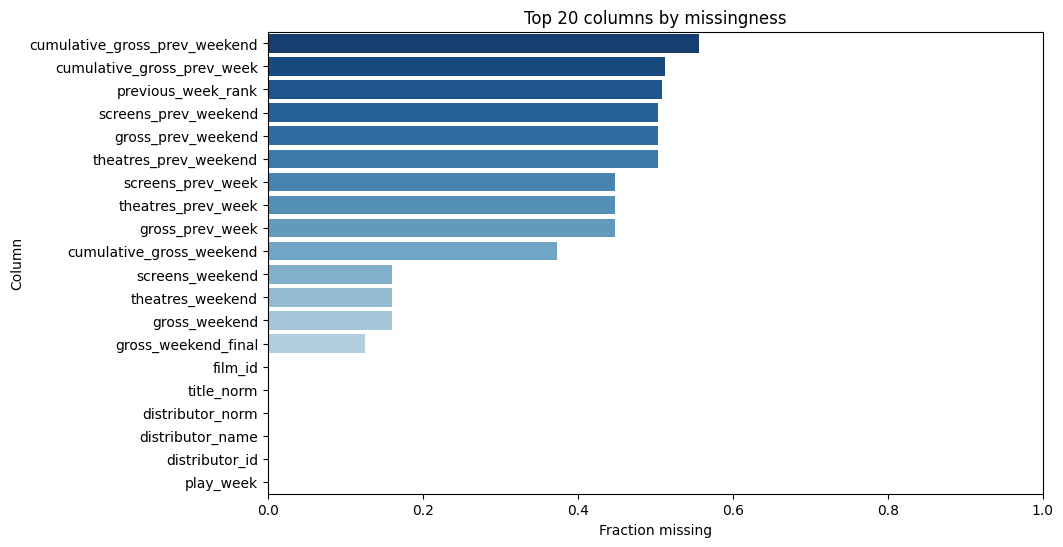

In [ ]:
# Missingness by column 
top_n = 20
miss = df_flat.isna().mean().sort_values(ascending=False).head(top_n)
plt.figure(figsize=(10, max(4, 0.3*len(miss))))
sns.barplot(x=miss.values, y=miss.index, orient='h', palette='Blues_r')
plt.xlabel('Fraction missing')
plt.ylabel('Column')
plt.title(f'Top {len(miss)} columns by missingness')
plt.xlim(0, 1)
plt.show()

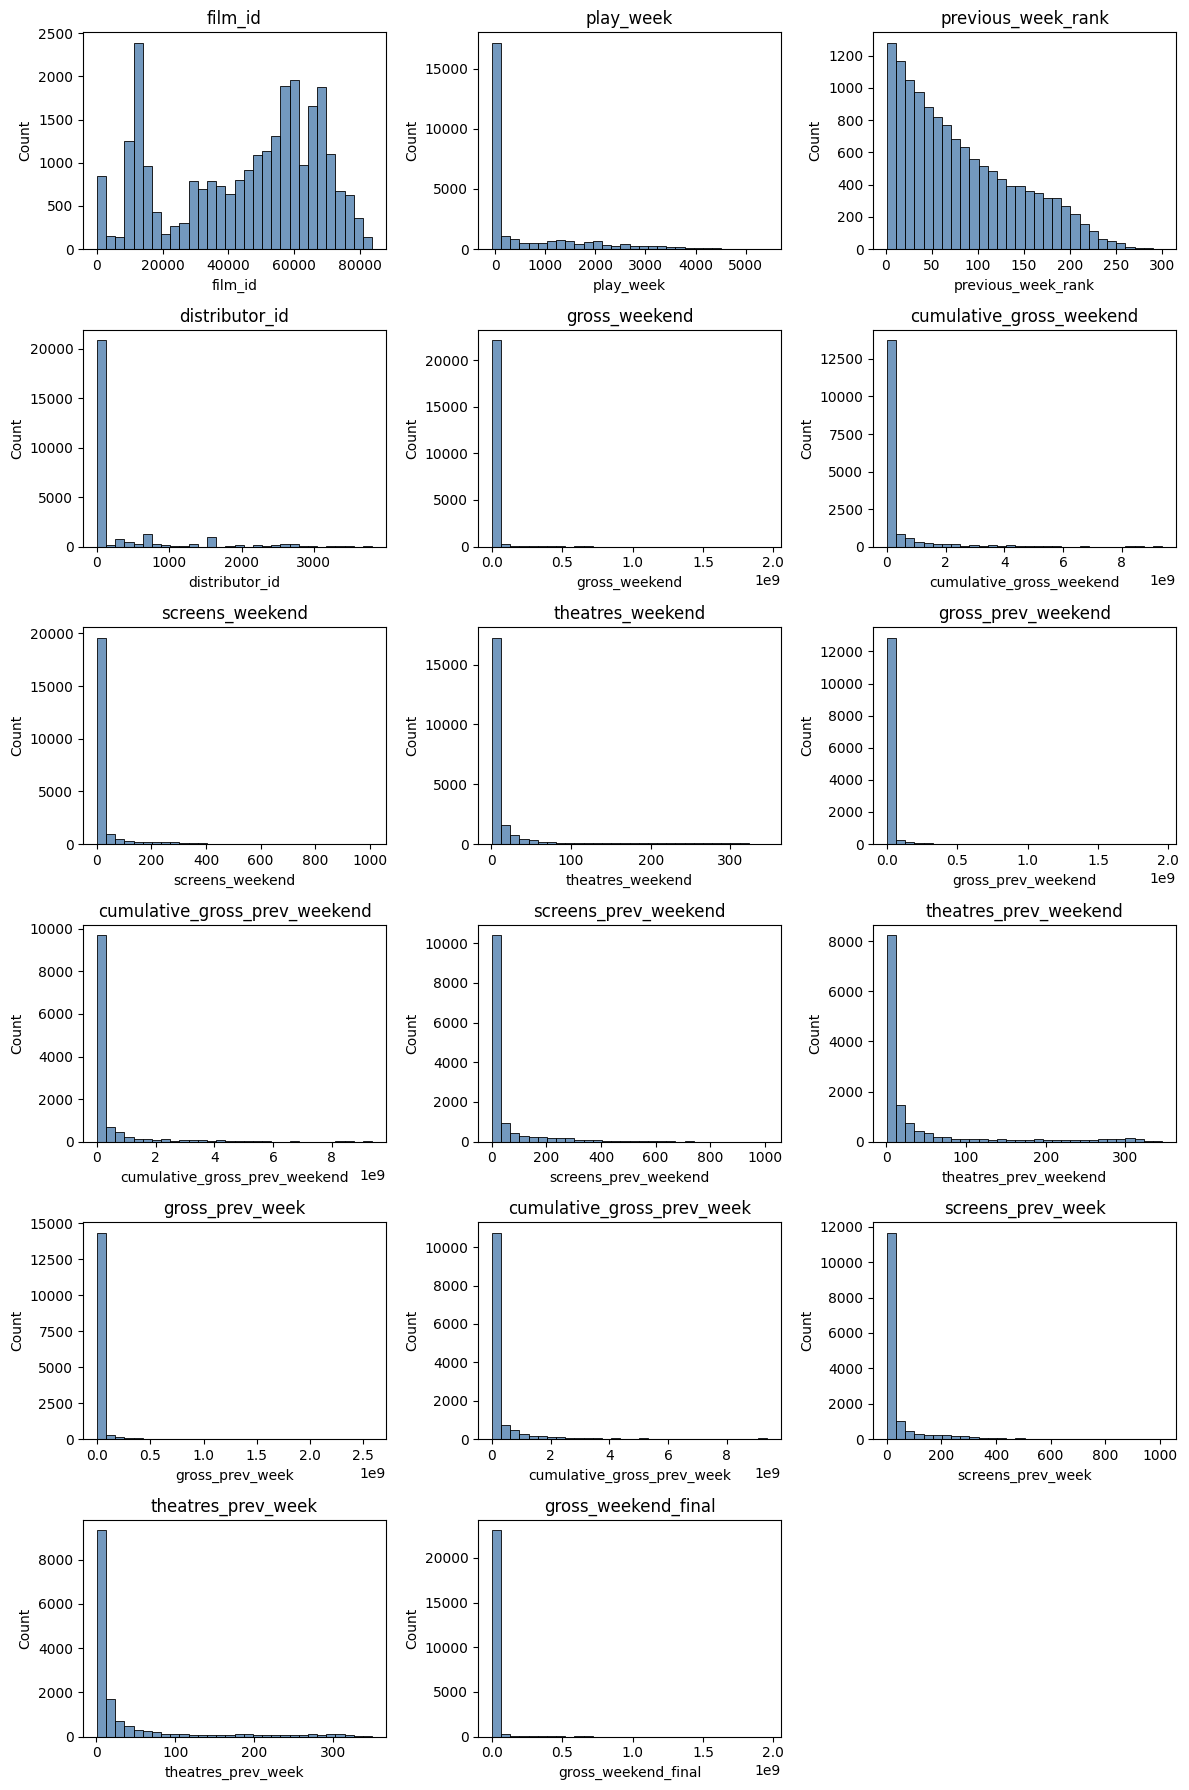

In [ ]:
# # Numeric distributions 
# num_cols = df_flat.select_dtypes(include=['number']).columns.tolist()
# if num_cols:
#     sample = df_flat[num_cols]
#     if len(sample) > 50000:
#         sample = sample.sample(50000, random_state=42)
#     k = len(num_cols)
#     cols = 3
#     rows = int(np.ceil(k/cols))
#     fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
#     axes = axes.flatten() if k > 1 else [axes]
#     for i, c in enumerate(num_cols):
#         sns.histplot(sample[c], ax=axes[i], kde=False, bins=30, color='#4477AA')
#         axes[i].set_title(c)
#     for j in range(i+1, rows*cols):
#         fig.delaxes(axes[j])
#     plt.tight_layout()
#     plt.show()
# else:
#     print('No numeric columns found for histograms.')
# may not be needed 

C:\Users\Nebula PC\AppData\Local\Temp\ipykernel_15116\3413974246.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, orient='h', palette='Greens_r')


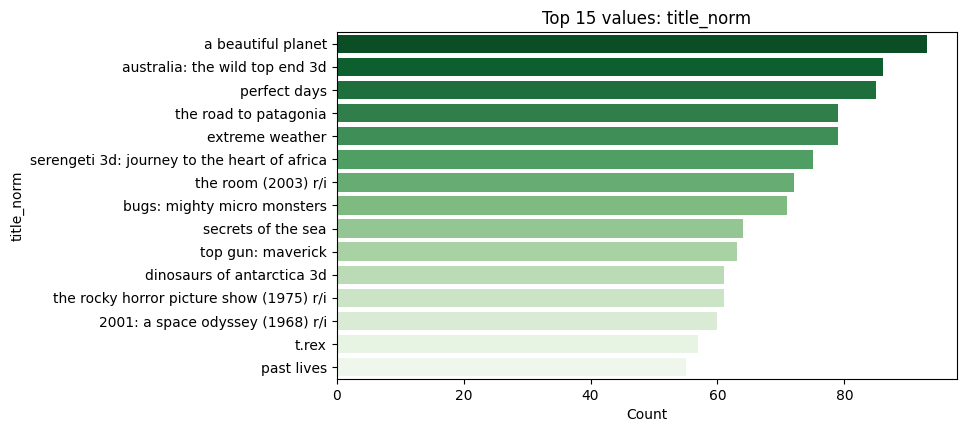

C:\Users\Nebula PC\AppData\Local\Temp\ipykernel_15116\3413974246.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, orient='h', palette='Greens_r')


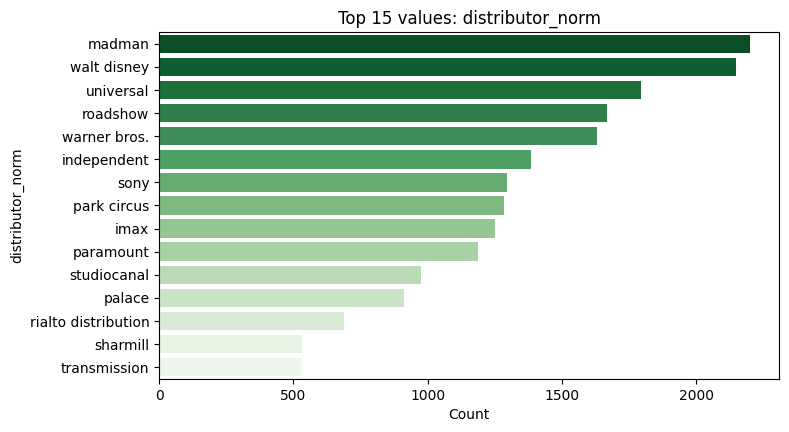

C:\Users\Nebula PC\AppData\Local\Temp\ipykernel_15116\3413974246.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, orient='h', palette='Greens_r')


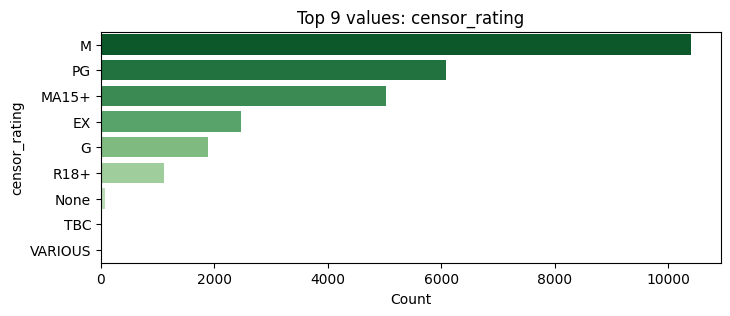

In [ ]:
#  Top categories for categorical columns 
all_cats = df_flat.select_dtypes(include=['object']).columns.tolist()
norm_cols = [c for c in all_cats if c.endswith('_norm')]
#  Specific columns 
force_include = ['censor_rating']
forced_cols = [c for c in all_cats if c in force_include]
cat_cols = list(dict.fromkeys(norm_cols + forced_cols))  
top_k = 15
if cat_cols:
    for c in cat_cols[:10]:  # limit to first 10 categorical columns to keep it quick
        vc = df_flat[c].astype(str).value_counts(dropna=False).head(top_k)
        plt.figure(figsize=(8, max(3, 0.3*len(vc))))
        sns.barplot(x=vc.values, y=vc.index, orient='h', palette='Greens_r')
        plt.title(f"Top {len(vc)} values: {c}")
        plt.xlabel('Count')
        plt.ylabel(c)
        plt.show()
else:
    print("No categorical *_norm columns (or forced includes) found for top-k plots.")

In [ ]:
# Top movies by revenue 
def first_present(cands):
    return next((c for c in cands if c in df_flat.columns), None)

title_col = first_present(['title_norm','title','film_title','movie_title','title_name']) or first_present(['film_id','movie_id'])
week_col = first_present(['week','play_week','week_number','week_num','date','week_end_date'])
rev_week_col = first_present(['gross_weekend','weekend_gross','gross_week','gross','revenue_weekend'])
rev_cume_col = first_present(['cumulative_gross_weekend','cume_gross_weekend','total_gross','lifetime_gross'])
rev_final_col = first_present(['gross_weekend_final','weekend_gross_final'])

if title_col is None:
    raise ValueError("Could not find a title or id column to group by.")

print('Using columns -> title:', title_col, '| weekly:', rev_week_col, '| cumulative:', rev_cume_col, '| final:', rev_final_col)

# Top by cumulative total
if rev_cume_col:
    top_cume = (df_flat.groupby(title_col, dropna=False)[rev_cume_col]
                .max().sort_values(ascending=False).head(10))
    display(top_cume.to_frame(name='cumulative_total'))
else:
    print('No cumulative column found; skipping cumulative toplist.')

# Top by sum of weekly gross 
if rev_week_col:
    top_sum = (df_flat.groupby(title_col, dropna=False)[rev_week_col]
               .sum().sort_values(ascending=False).head(10))
    display(top_sum.to_frame(name='sum_weekly_gross'))
else:
    print('No weekly gross column found; skipping weekly-sum toplist.')

# Top by best single-weekend peak
if rev_week_col:
    top_peak = (df_flat.groupby(title_col, dropna=False)[rev_week_col]
                .max().sort_values(ascending=False).head(10))
    display(top_peak.to_frame(name='peak_single_weekend'))

# Show details for the top title from the best available metric
winner = None
if rev_cume_col and not (df_flat[rev_cume_col].dropna().empty):
    winner = top_cume.index[0]
elif rev_week_col:
    winner = top_sum.index[0] if 'top_sum' in locals() else top_peak.index[0]

if winner is not None:
    print("Winner:", winner)
    detail_cols = [c for c in [title_col, week_col, rev_week_col, rev_cume_col, rev_final_col] if c]
    df_detail = df_flat.loc[df_flat[title_col] == winner, detail_cols].copy()
    if week_col and np.issubdtype(df_detail[week_col].dtype, np.datetime64):
        df_detail = df_detail.sort_values(week_col)
    elif week_col:
        df_detail = df_detail.sort_values(week_col, kind='mergesort')
    display(df_detail.head(20))

Using columns -> title: title_norm | weekly: gross_weekend | cumulative: cumulative_gross_weekend | final: gross_weekend_final


,cumulative_total
title_norm,
avatar: the way of water,9.376227e+09
top gun: maverick,9.353303e+09
barbie,8.645612e+09
avengers: endgame,8.420493e+09
spider-man: no way home,8.178079e+09
deadpool & wolverine,6.782777e+09
"lion king, the (2019)",6.413915e+09
avengers: infinity war,6.204199e+09
a minecraft movie,5.628186e+09


,sum_weekly_gross
title_norm,
barbie,6.669911e+09
deadpool & wolverine,5.172855e+09
inside out 2,3.953357e+09
a minecraft movie,3.775396e+09
moana 2,3.675091e+09
the super mario bros. movie,3.367461e+09
wicked,3.363488e+09
oppenheimer,3.229058e+09
despicable me 4,2.976981e+09


,peak_single_weekend
title_norm,
barbie,1.956146e+09
deadpool & wolverine,1.759947e+09
a minecraft movie,1.369238e+09
moana 2,1.237702e+09
the super mario bros. movie,1.055269e+09
guardians of the galaxy vol. 3,9.484554e+08
oppenheimer,9.403042e+08
lilo & stitch,9.267515e+08
inside out 2,9.162869e+08


Winner: avatar: the way of water


,title_norm,play_week,gross_weekend,cumulative_gross_weekend,gross_weekend_final
5777,avatar: the way of water,4,827834285.0,6.671366e+09,827834285.0
10900,avatar: the way of water,5,519450852.0,7.516592e+09,519450852.0
20144,avatar: the way of water,6,405874364.0,8.140458e+09,405874364.0
17700,avatar: the way of water,7,326542273.0,8.626111e+09,326542273.0
17819,avatar: the way of water,8,172267544.0,8.878685e+09,172267544.0
4433,avatar: the way of water,9,118557572.0,9.039133e+09,118557572.0
8289,avatar: the way of water,10,63531813.0,9.145747e+09,63531813.0
8425,avatar: the way of water,11,59192307.0,9.223160e+09,59192307.0
11036,avatar: the way of water,12,41002784.0,9.278682e+09,41002784.0
6,avatar: the way of water,13,26086967.0,9.316615e+09,26086967.0


## Top movies by revenue 
- Top 10 by cumulative total 
- Top 10 by sum of weekly gross
- Top 10 by best single-weekend peak
- A simple time series for the top title

C:\Users\Nebula PC\AppData\Local\Temp\ipykernel_15116\1826029994.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=s_scaled.values, y=s_scaled.index, orient='h', palette='mako')


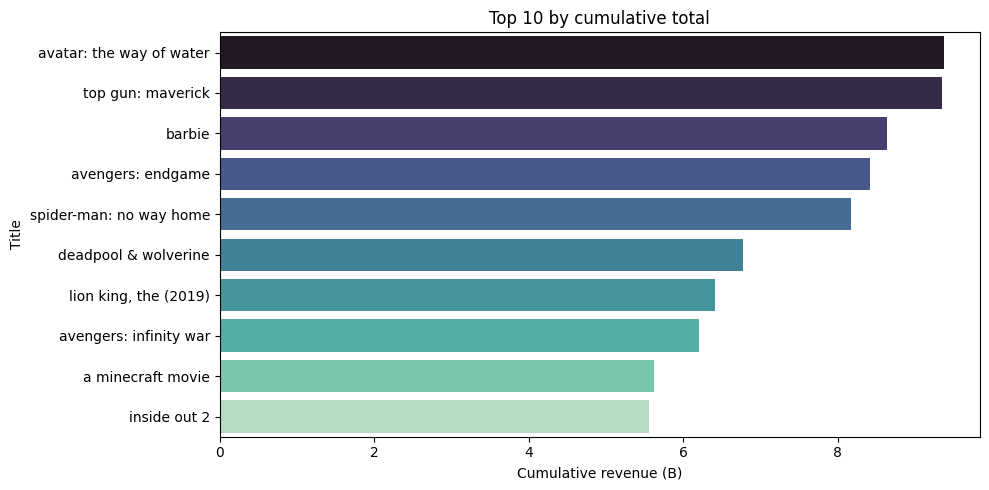

C:\Users\Nebula PC\AppData\Local\Temp\ipykernel_15116\1826029994.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=s_scaled.values, y=s_scaled.index, orient='h', palette='mako')


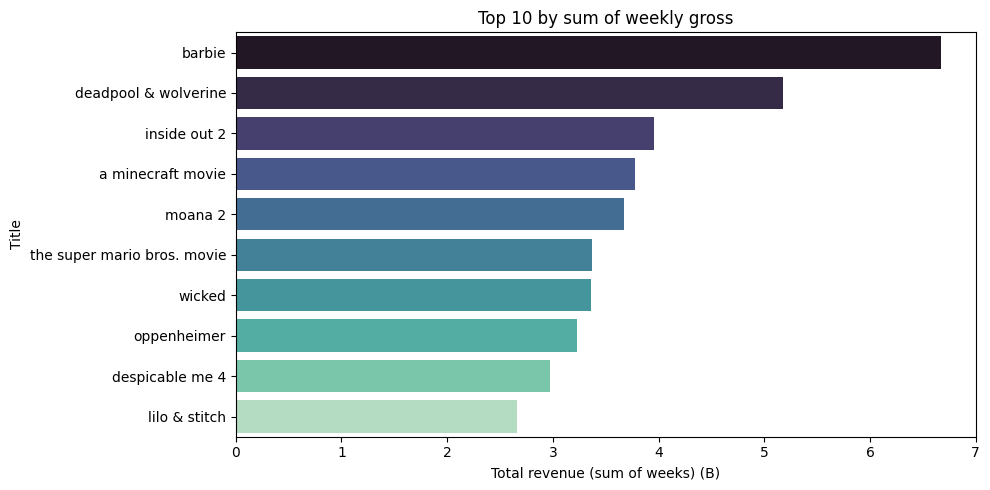

C:\Users\Nebula PC\AppData\Local\Temp\ipykernel_15116\1826029994.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=s_scaled.values, y=s_scaled.index, orient='h', palette='mako')


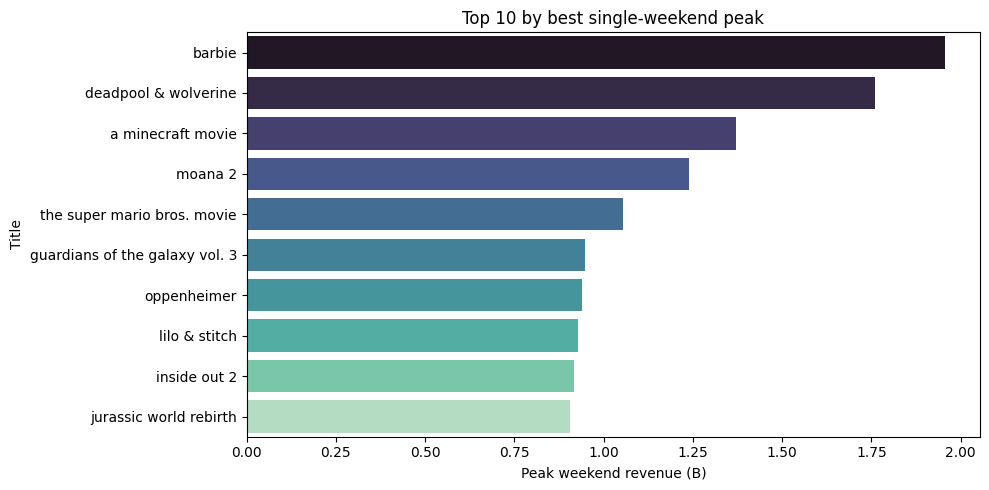

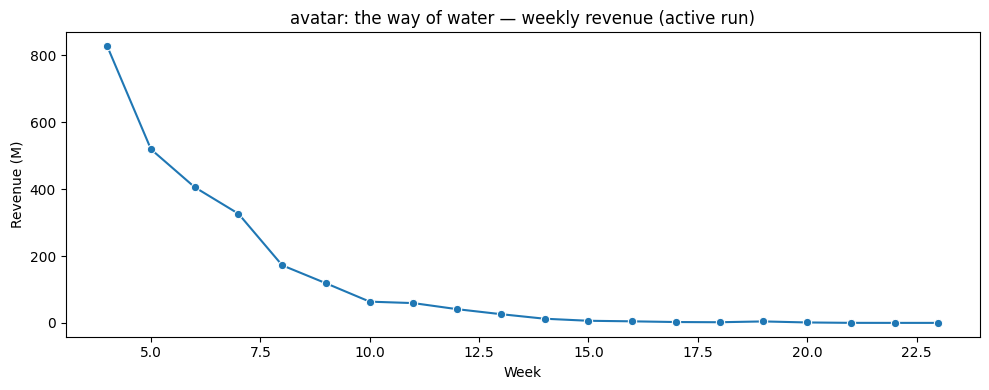

Plotted 20 periods for active run. Y-axis scaled to M.


In [ ]:
# Visualize the toplists and winner time series
def first_present(cands):
    return next((c for c in cands if c in df_flat.columns), None)

title_col = first_present(['title_norm','title','film_title','movie_title','title_name']) or first_present(['film_id','movie_id'])
week_col = first_present(['week','play_week','week_number','week_num','date','week_end_date'])
rev_week_col = first_present(['gross_weekend','weekend_gross','gross_week','gross','revenue_weekend'])
rev_cume_col = first_present(['cumulative_gross_weekend','cume_gross_weekend','total_gross','lifetime_gross'])

# Helper: auto-scale large currency values to K/M/B
def auto_scale(max_val: float):
    if pd.isna(max_val) or max_val <= 0:
        return 1.0, ''
    if max_val >= 1e9:
        return 1e9, 'B'
    if max_val >= 1e6:
        return 1e6, 'M'
    if max_val >= 1e3:
        return 1e3, 'K'
    return 1.0, ''

# Compute toplists 
top_cume = None
top_sum = None
top_peak = None
if rev_cume_col := rev_cume_col if 'rev_cume_col' in globals() else first_present(['cumulative_gross_weekend','cume_gross_weekend','total_gross','lifetime_gross']):
    top_cume = (df_flat.groupby(title_col, dropna=False)[rev_cume_col].max().sort_values(ascending=False).head(10))
if rev_week_col := rev_week_col if 'rev_week_col' in globals() else first_present(['gross_weekend','weekend_gross','gross_week','gross','revenue_weekend']):
    top_sum = (df_flat.groupby(title_col, dropna=False)[rev_week_col].sum().sort_values(ascending=False).head(10))
    top_peak = (df_flat.groupby(title_col, dropna=False)[rev_week_col].max().sort_values(ascending=False).head(10))

def barplot_series(s, title, base_xlabel):
    if s is None or s.empty:
        return
    scale, unit = auto_scale(float(np.nanmax(s.values)))
    s_scaled = s / scale
    plt.figure(figsize=(10, 5))
    sns.barplot(x=s_scaled.values, y=s_scaled.index, orient='h', palette='mako')
    plt.title(title)
    xlabel = base_xlabel + (f' ({unit})' if unit else '')
    plt.xlabel(xlabel)
    plt.ylabel('Title')
    plt.tight_layout()
    plt.show()

barplot_series(top_cume, 'Top 10 by cumulative total', 'Cumulative revenue')
barplot_series(top_sum, 'Top 10 by sum of weekly gross', 'Total revenue (sum of weeks)')
barplot_series(top_peak, 'Top 10 by best single-weekend peak', 'Peak weekend revenue')

# Winner time series
winner = None
if top_cume is not None:
    winner = top_cume.index[0]
elif top_sum is not None:
    winner = top_sum.index[0]
elif top_peak is not None:
    winner = top_peak.index[0]

if winner is not None and week_col and rev_week_col:
    df_w = df_flat.loc[df_flat[title_col] == winner, [week_col, rev_week_col]].copy()
    # Coerce textual dates to datetime
    if df_w[week_col].dtype == 'object':
        try:
            df_w[week_col] = pd.to_datetime(df_w[week_col], errors='coerce')
        except Exception:
            pass
    # Sort by time/week
    if np.issubdtype(df_w[week_col].dtype, np.datetime64):
        df_w = df_w.sort_values(week_col)
    else:
        df_w = df_w.sort_values(week_col, kind='mergesort')
    # Aggregate duplicate weeks by summing revenue
    df_w = df_w.groupby(week_col, as_index=False)[rev_week_col].sum()
    df_w['_pos'] = df_w[rev_week_col].fillna(0) > 0
    if df_w['_pos'].any():
        blocks = (df_w['_pos'] != df_w['_pos'].shift(fill_value=False)).cumsum()
        df_w['_block'] = blocks
        run_sizes = df_w.loc[df_w['_pos']].groupby('_block').size().sort_values(ascending=False)
        best_block = run_sizes.index[0]
        df_w = df_w[(df_w['_block'] == best_block) & (df_w['_pos'])].copy()
        df_w.drop(columns=['_pos','_block'], inplace=True)
    else:
        df_w = df_w.dropna(subset=[rev_week_col])

    # Auto-scale Y for readability
    ymax = float(df_w[rev_week_col].max()) if len(df_w) else 0.0
    scale, unit = auto_scale(ymax)
    plt.figure(figsize=(10,4))
    sns.lineplot(x=df_w[week_col], y=df_w[rev_week_col] / scale, marker='o')
    plt.title(f'{winner} — weekly revenue (active run)')
    plt.xlabel('Week' if not np.issubdtype(df_w[week_col].dtype, np.datetime64) else 'Date (weekly)')
    ylabel = 'Revenue' + (f' ({unit})' if unit else '')
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()
    print(f"Plotted {len(df_w)} periods for active run. Y-axis scaled to {unit or 'units'}.")
else:
    print('Winner time series skipped (missing week or weekly revenue column).')